In [1]:
import visa 
import numpy as np
import serial
import time
import os
import math
import h5py
from utils import *
from pathlib import Path
path = os.getcwd()
path = Path(path)
print(Path(str(path.parent) + '\\Classes\\') )

import sys
sys.path.append(str(path.parent) + '\\Classes\\')
from SMA100B import *
from vna import *
from SIM928 import *

%load_ext autoreload
%autoreload 2

C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\visa.py:13: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  warnings.warn(


C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\Classes
C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\Classes


In [2]:
field_fox = vna('192.168.3.3')
field_fox.query('*IDN?')

'Keysight Technologies,N9916A,MY53104702,A.08.01\n'

In [3]:
pump = SMA100B('192.168.3.2')
pump.query('*IDN?')

'Rohde&Schwarz,SMA100B,1419.8888K02/105168,4.70.205.75  \n'

In [9]:
#pump frequency
p0 = -20
p1 = -16
dp = 0.05
N_p = math.floor((p1-p0)/dp)
print(N_p)

f, d = field_fox.SA_print_data()
n_points = f.size

storage_hdf5('gain@5GHz_vs_pump _power.hdf5', f, 'freq')
print(n_points)

maxima = np.empty(N_p)

#formula magica per calcolare tempi acquisizione con triplo ciclo in voltaggio, potenza e frequenza della pompa
#print(str(((((5.542317152023315*N_f)+0.002000093460083008)*N_p)+5.001286268234253)*N_v/(3600*24)) + ' giorni')

80
1001


In [10]:
i = 0
start_time = time.time()
for i in range(0, N_p):
    pump.set_ampl(p0+i*dp)
    f, d = field_fox.SA_print_data()
    maxima[i] = max(d)
stop_time = time.time() - start_time
print(stop_time)
storage_hdf5('gain@5GHz_vs_pump _power.hdf5', maxima, 'maxima')

68.31190705299377


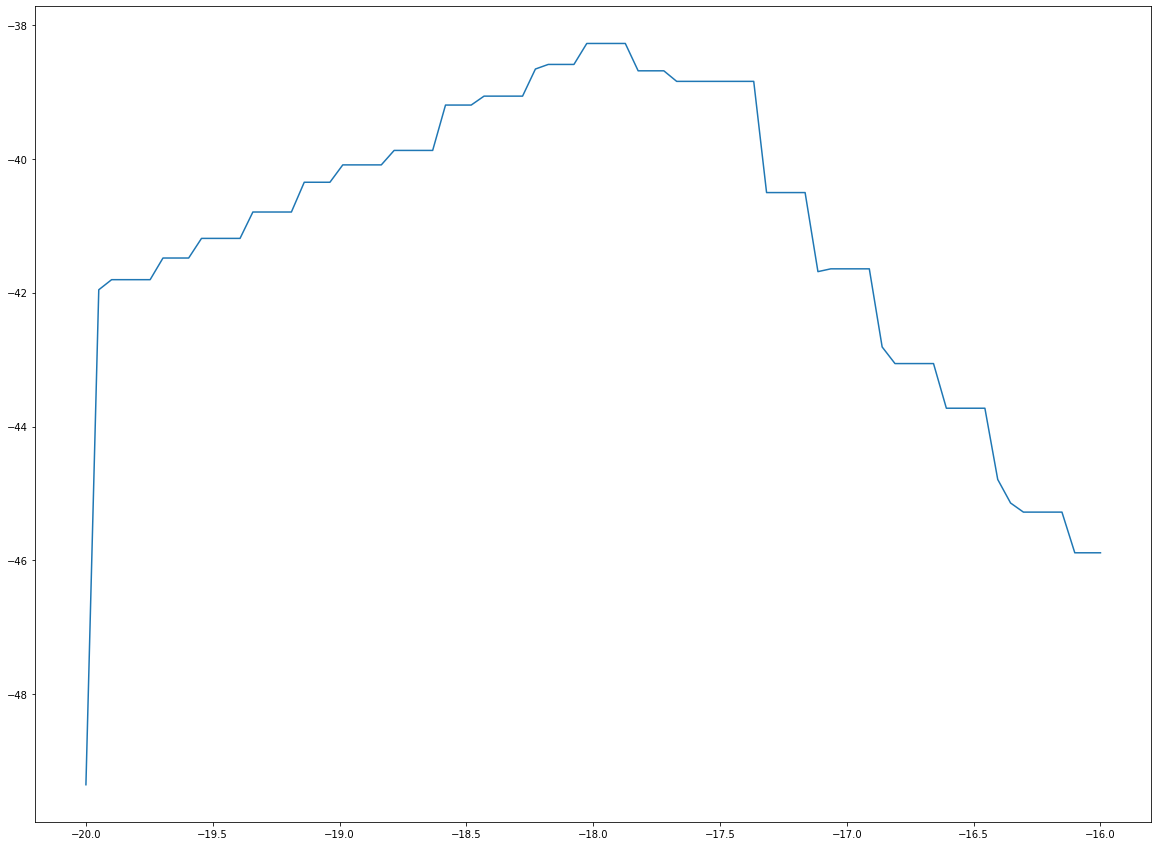

In [11]:
plt.figure(figsize=(20,15))
P = np.linspace(p0,p1,N_p)
storage_hdf5('gain@5GHz_vs_pump _power.hdf5', P, 'pump_ampl')
plt.plot(P, maxima)
#plt.xlim(17.9e9,18e9)

In [12]:
P

array([-20.        , -19.94936709, -19.89873418, -19.84810127,
       -19.79746835, -19.74683544, -19.69620253, -19.64556962,
       -19.59493671, -19.5443038 , -19.49367089, -19.44303797,
       -19.39240506, -19.34177215, -19.29113924, -19.24050633,
       -19.18987342, -19.13924051, -19.08860759, -19.03797468,
       -18.98734177, -18.93670886, -18.88607595, -18.83544304,
       -18.78481013, -18.73417722, -18.6835443 , -18.63291139,
       -18.58227848, -18.53164557, -18.48101266, -18.43037975,
       -18.37974684, -18.32911392, -18.27848101, -18.2278481 ,
       -18.17721519, -18.12658228, -18.07594937, -18.02531646,
       -17.97468354, -17.92405063, -17.87341772, -17.82278481,
       -17.7721519 , -17.72151899, -17.67088608, -17.62025316,
       -17.56962025, -17.51898734, -17.46835443, -17.41772152,
       -17.36708861, -17.3164557 , -17.26582278, -17.21518987,
       -17.16455696, -17.11392405, -17.06329114, -17.01265823,
       -16.96202532, -16.91139241, -16.86075949, -16.81

In [13]:
for i in range(0, N_p):
    print(p0+i*dp)

-20.0
-19.95
-19.9
-19.85
-19.8
-19.75
-19.7
-19.65
-19.6
-19.55
-19.5
-19.45
-19.4
-19.35
-19.3
-19.25
-19.2
-19.15
-19.1
-19.05
-19.0
-18.95
-18.9
-18.85
-18.8
-18.75
-18.7
-18.65
-18.6
-18.55
-18.5
-18.45
-18.4
-18.35
-18.3
-18.25
-18.2
-18.15
-18.1
-18.05
-18.0
-17.95
-17.9
-17.85
-17.8
-17.75
-17.7
-17.65
-17.6
-17.55
-17.5
-17.45
-17.4
-17.35
-17.3
-17.25
-17.2
-17.15
-17.1
-17.05
-17.0
-16.95
-16.9
-16.85
-16.8
-16.75
-16.7
-16.65
-16.6
-16.55
-16.5
-16.45
-16.4
-16.35
-16.3
-16.25
-16.2
-16.15
-16.1
-16.05


In [39]:
M = np.argmax(maxima)
print(F[M]*1e-9)
print(max(maxima))

17.95880979404897
-40.2032127


In [21]:
#bias 0.383 V soglia

[autoreload of utils failed: Traceback (most recent call last):
  File "C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "C:\Users\oper\AppData\Local\Programs\Python\Python38\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\oper\Desktop\labparamp\QTLab2122\TWPA\notebooks\utils.py", line 28
    if
      ^
SyntaxEr